**FULL CODE HERE**

Value counts for 'weather':
 weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

First 10 rows of the dataset:
          date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
5  2012-01-06            2.5       4.4       2.2   2.2     rain
6  2012-01-07            0.0       7.2       2.8   2.3     rain
7  2012-01-08            0.0      10.0       2.8   2.0      sun
8  2012-01-09            4.3       9.4       5.0   3.4     rain
9  2012-01-10            1.0       6.1       0.6   3.4     rain


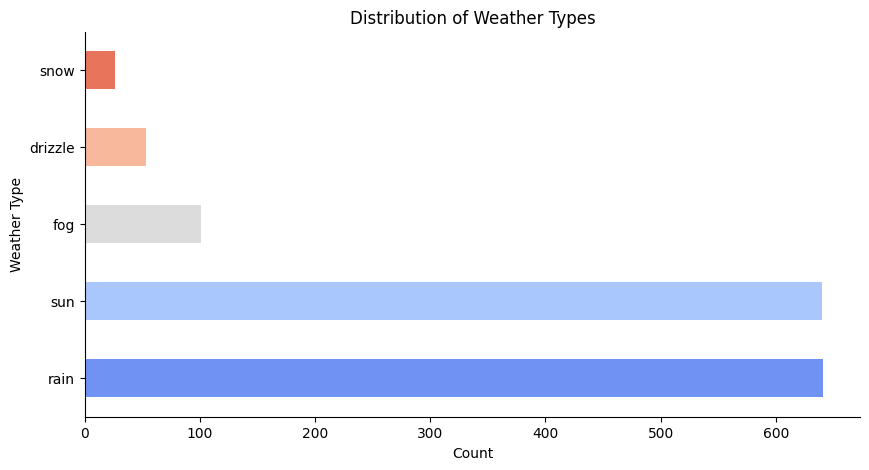

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 321.9006
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 317.8658
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 268.9637
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 184.6780
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 105.0845
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 58.9168
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.5813
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 24.3266
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 19.7533
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.9849
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.3379
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Comparison of Regression Models:
                            Mean Squared Error  Root Mean Squared Error  \
Linear Regression                   11.103519                 3.332194   
Random Forest              

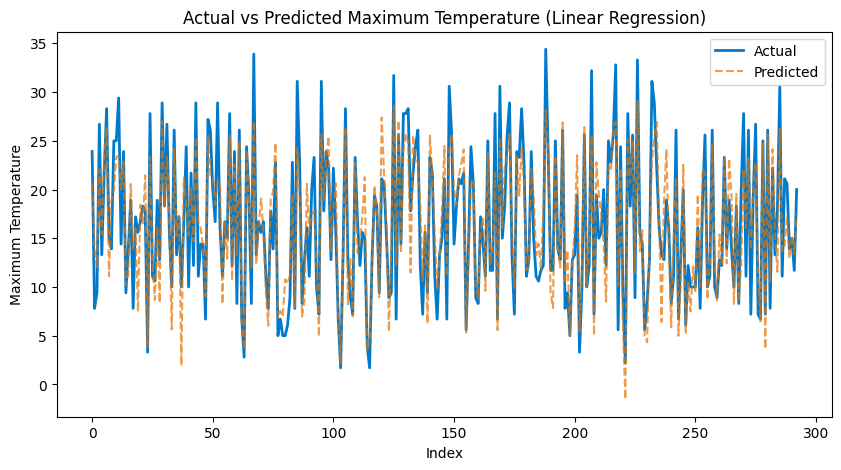

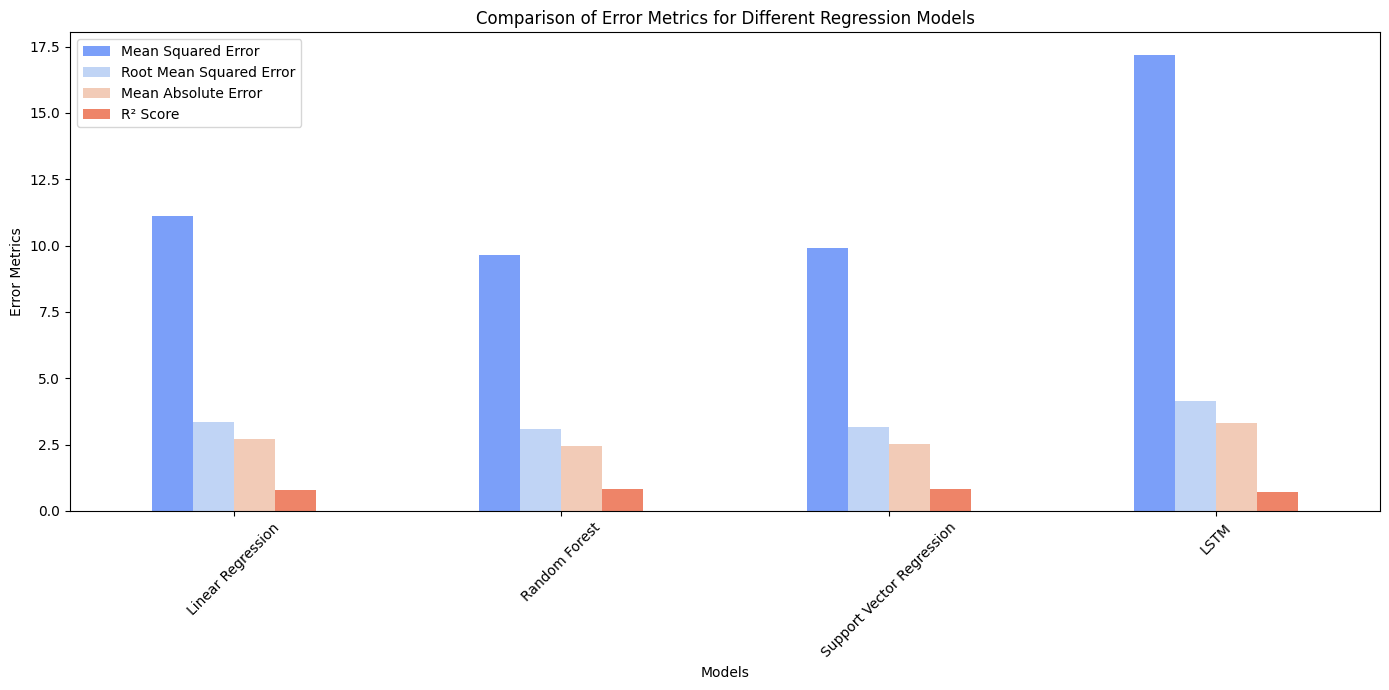

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Explore the Dataset
file_path = 'seattle-weather.csv'
data = pd.read_csv(file_path)

# Display value counts for 'weather' column
print("Value counts for 'weather':\n", data['weather'].value_counts())

# Display the first 10 rows of the dataset
print("\nFirst 10 rows of the dataset:\n", data.head(10))

# Plot the distribution of 'weather' column
plt.figure(figsize=(10, 5))
data['weather'].value_counts().plot(kind='barh', color=sns.color_palette('coolwarm', len(data['weather'].unique())))
plt.title('Distribution of Weather Types')
plt.xlabel('Count')
plt.ylabel('Weather Type')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Data Preprocessing
# Ensure 'date' column exists and is correctly formatted
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data.dropna(subset=['date'], inplace=True)  # Drop rows where 'date' could not be parsed
    data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data = data.drop(columns=['date'])

# Handle missing values by filling them with the mean of the column
data.fillna(data.mean(numeric_only=True), inplace=True)

# Encode categorical 'weather' column
if 'weather' in data.columns:
    label_encoder = LabelEncoder()
    data['weather'] = label_encoder.fit_transform(data['weather'])

# Define Features and Target Variable
features = ['precipitation', 'temp_min', 'wind']
target = 'temp_max'
X = data[features]
y = data[target]

# Normalize/Standardize the Feature Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape Data for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Model Evaluation Function
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'Mean Squared Error': mse, 'Root Mean Squared Error': rmse,
            'Mean Absolute Error': mae, 'R² Score': r2}

# Define and Evaluate Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regression': SVR()
}
results = {name: evaluate_model(model, X_train, y_train, X_test, y_test) for name, model in models.items()}

# LSTM Model Definition
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM Model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)

# Make Predictions with LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Evaluate LSTM Model
results['LSTM'] = evaluate_model(lstm_model, X_train_lstm, y_train, X_test_lstm, y_test)

# Display the Results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nComparison of Regression Models:\n", results_df)

# Visualization
# 1. Visualize the Predicted vs Actual Values for Linear Regression
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': models['Linear Regression'].predict(X_test)})
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual'].values, label='Actual', color='#007acc', linewidth=2)  # Cool blue color
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='#e67300', linestyle='--', alpha=0.7)  # Warm orange color
plt.legend()
plt.title('Actual vs Predicted Maximum Temperature (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Maximum Temperature')
plt.show()

# 2. Plot the Error Metrics Using the 'coolwarm' Palette
colors = sns.color_palette('coolwarm', n_colors=len(results_df.columns))
results_df.plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Comparison of Error Metrics for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**QUARTER CODE**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns


Value counts for 'weather':
 weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

First 10 rows of the dataset:
          date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
5  2012-01-06            2.5       4.4       2.2   2.2     rain
6  2012-01-07            0.0       7.2       2.8   2.3     rain
7  2012-01-08            0.0      10.0       2.8   2.0      sun
8  2012-01-09            4.3       9.4       5.0   3.4     rain
9  2012-01-10            1.0       6.1       0.6   3.4     rain


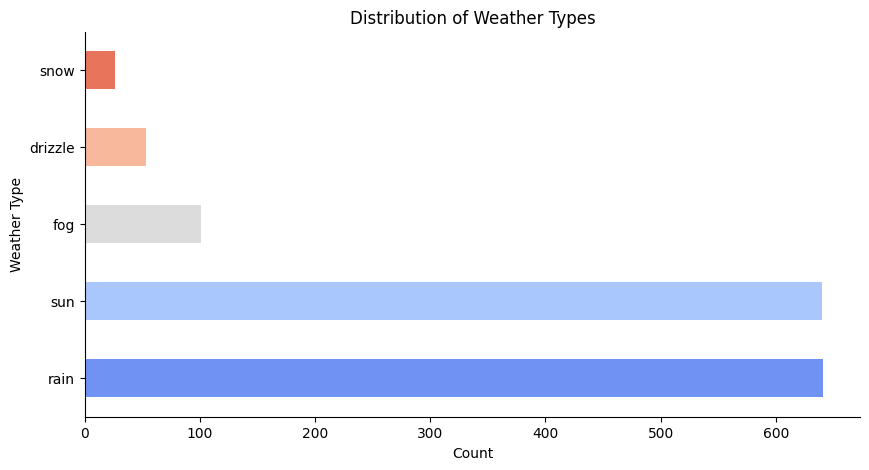

In [ ]:
# Load the dataset
file_path = 'seattle-weather.csv'
data = pd.read_csv(file_path)

# Display value counts for 'weather' column
print("Value counts for 'weather':\n", data['weather'].value_counts())

# Display the first 10 rows of the dataset
print("\nFirst 10 rows of the dataset:\n", data.head(10))

# Plot the distribution of 'weather' column
plt.figure(figsize=(10, 5))
data['weather'].value_counts().plot(kind='barh', color=sns.color_palette('coolwarm', len(data['weather'].unique())))
plt.title('Distribution of Weather Types')
plt.xlabel('Count')
plt.ylabel('Weather Type')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Ensure 'date' column exists and is correctly formatted
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    data.dropna(subset=['date'], inplace=True)  # Drop rows where 'date' could not be parsed
    data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data = data.drop(columns=['date'])
# Handle missing values by filling them with the mean of the column
data.fillna(data.mean(numeric_only=True), inplace=True)
# Encode categorical 'weather' column
if 'weather' in data.columns:
    label_encoder = LabelEncoder()
    data['weather'] = label_encoder.fit_transform(data['weather'])
# Define features (X) and target variable (y)
features = ['precipitation', 'temp_min', 'wind']
target = 'temp_max'
X = data[features]
y = data[target]
# Normalize/Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Reshape data for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'Mean Squared Error': mse, 'Root Mean Squared Error': rmse,
            'Mean Absolute Error': mae, 'R² Score': r2}
# Define and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regression': SVR()
}
results = {name: evaluate_model(model, X_train, y_train, X_test, y_test) for name, model in models.items()}
# LSTM Model Definition
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# Train LSTM model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=1)
# Make predictions with LSTM
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Evaluate LSTM model
results['LSTM'] = evaluate_model(lstm_model, X_train_lstm, y_train, X_test_lstm, y_test)
# Display the results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nComparison of Regression Models:\n", results_df)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 315.5358
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 308.9409
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 260.4980
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 175.4528
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 101.1099
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 57.5103
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 31.1844
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 22.3548
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 22.6697
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 19.9209
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9083
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Comparison of Regression Models:
                            Mean Squared Error  Root Mean Squared Error  \
Linear Regression                   11.103519                 3.332194   
Random Forest        

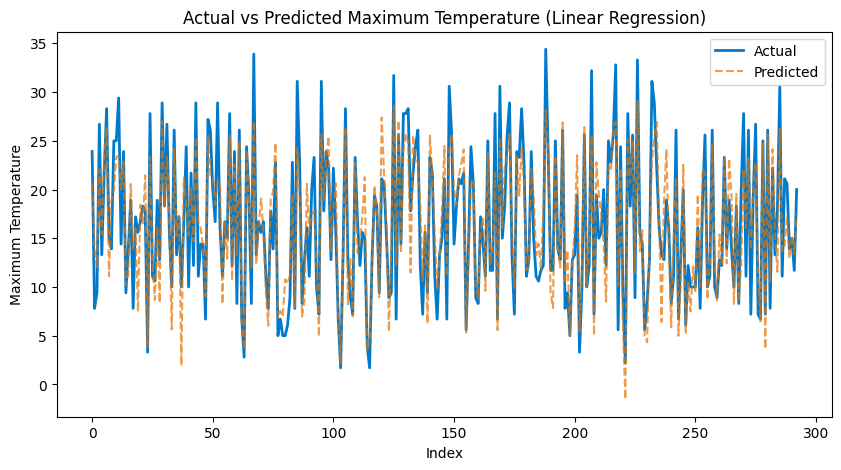

In [ ]:
# Visualize the predicted vs actual values for one of the models (e.g., Linear Regression)
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': models['Linear Regression'].predict(X_test)})
plt.figure(figsize=(10, 5))
plt.plot(comparison_df['Actual'].values, label='Actual', color='#007acc', linewidth=2)  # Cool blue color
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='#e67300', linestyle='--', alpha=0.7)  # Warm orange color
plt.legend()
plt.title('Actual vs Predicted Maximum Temperature (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Maximum Temperature')
plt.show()


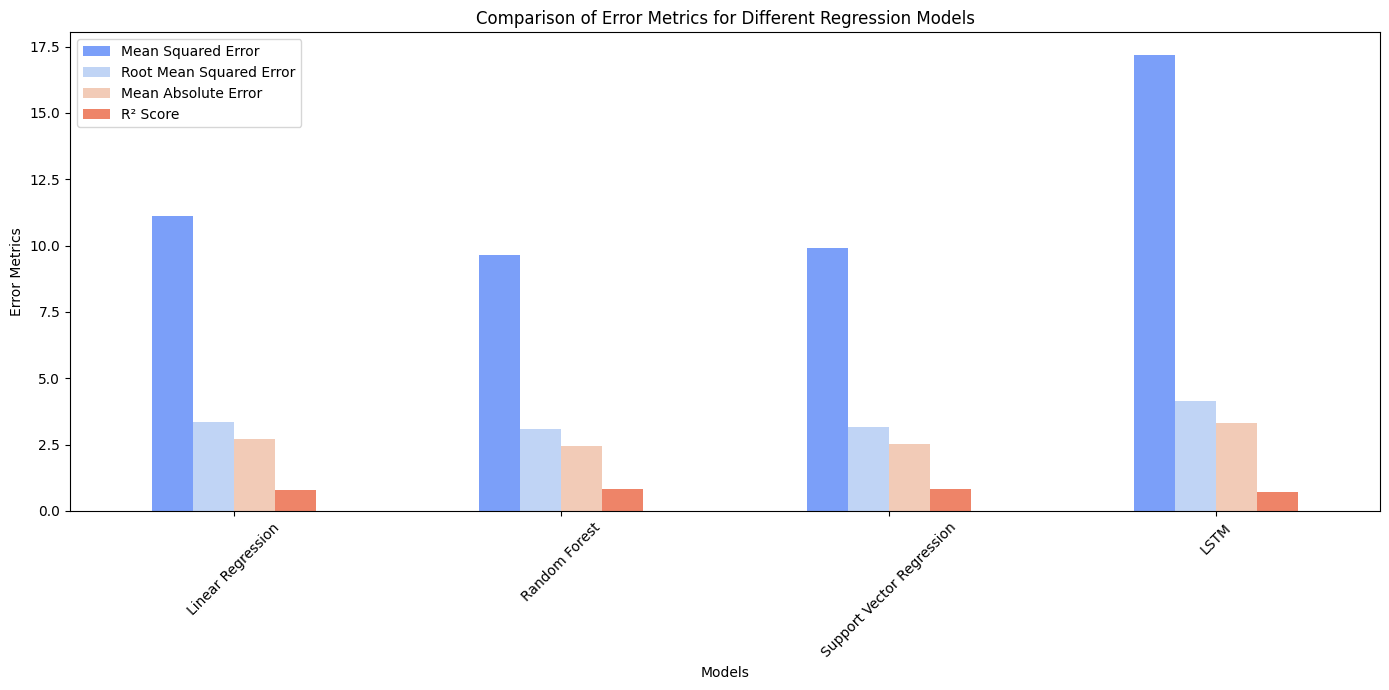

In [ ]:
# Plot the error metrics using the 'coolwarm' palette
colors = sns.color_palette('coolwarm', n_colors=len(results_df.columns))
results_df.plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Comparison of Error Metrics for Different Regression Models')
plt.xlabel('Models')
plt.ylabel('Error Metrics')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
